In [10]:
#pandas - used to perform data manipulation and analysis
#numpy - used to perform a wide variety of mathematical operations on arrays
import pandas as pd
import numpy as np

In [12]:
#lets name dataset as ds
ds = pd.read_csv('/content/spam (3).csv', encoding='latin-1')
ds = ds.rename(columns={'v1': 'label', 'v2': 'message'})
print(ds)

     label                                            message Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [15]:
# Data Preprocessing
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
#removing unwanted columns
ds = ds.dropna(axis=1)
ds.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# checing for null values
ds.isnull().sum()

label      0
message    0
dtype: int64

In [17]:
#checking duplicates:
ds.duplicated().sum()

403

In [18]:
#removing duplicates
ds= ds.drop_duplicates(keep='first')
ds.duplicated().sum()

0

In [19]:
# Using apply and lambda function to create 'label_encoded' column
ds['label_encoded'] = ds['label'].apply(lambda x: 0 if x == 'ham' else 1)

# Now ds contains the 'label_encoded' column
ds.head()

,label,message,label_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**Data Visualisation**

<ipython-input-20-e7ae2e5f0029>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=ds, palette='viridis')


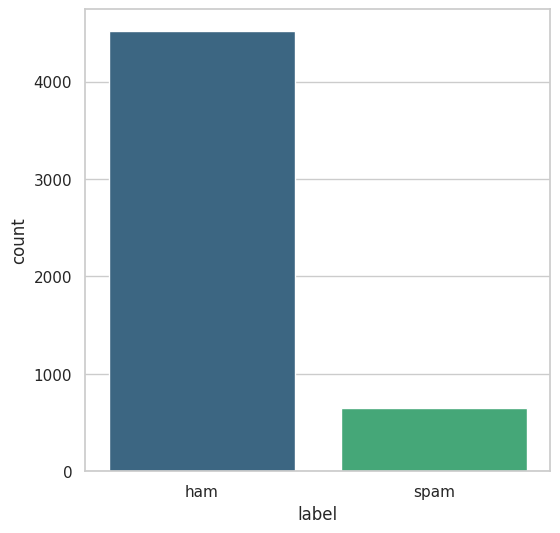

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Plot a bar
plt.figure(figsize=(6, 6))
sns.countplot(x='label', data=ds, palette='viridis')

# Display the plot
plt.show()


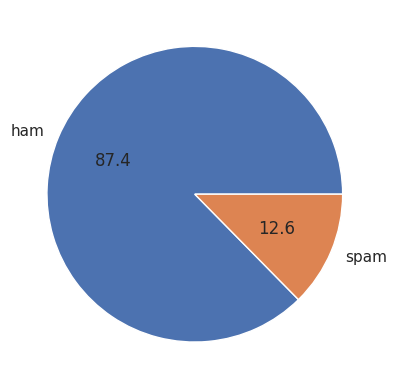

In [21]:
#pie chart
plt.pie(ds.label.value_counts(), labels=['ham', 'spam'], autopct="%0.1f")
plt.show()

In [22]:
ds['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

In [23]:
#we can see that 653 msg are spam i.e 12.6%

In [24]:
! pip install nltk

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
#exploring data analysis(EDA)
ds = ds.copy()
ds['char_length']=ds['message'].apply(len)

In [27]:
ds['num_words']=ds['message'].apply(lambda x:len(nltk.word_tokenize(x)))
ds.head()

,label,message,label_encoded,char_length,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,ham,U dun say so early hor... U c already then say...,0,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [28]:
ds['sentence_length']=ds['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
ds.head()

,label,message,label_encoded,char_length,num_words,sentence_length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [29]:
ds[['num_words','char_length','sentence_length']].describe()

,num_words,char_length,sentence_length
count,5169.000000,5169.000000,5169.000000
mean,18.455794,78.977945,1.965564
std,13.324758,58.236293,1.448541
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,38.000000


In [30]:
ds[ds['label_encoded']==0][['num_words','char_length','sentence_length']].describe()

,num_words,char_length,sentence_length
count,4516.000000,4516.000000,4516.000000
mean,17.123782,70.459256,1.820195
std,13.493970,56.358207,1.383657
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,38.000000


In [31]:
ds[ds['label_encoded']==1][['num_words','char_length','sentence_length']].describe()

,num_words,char_length,sentence_length
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.970904
std,7.008418,30.137753,1.488425
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


Text(0.5, 1.0, 'Distribution of spam and ham messages charaters')

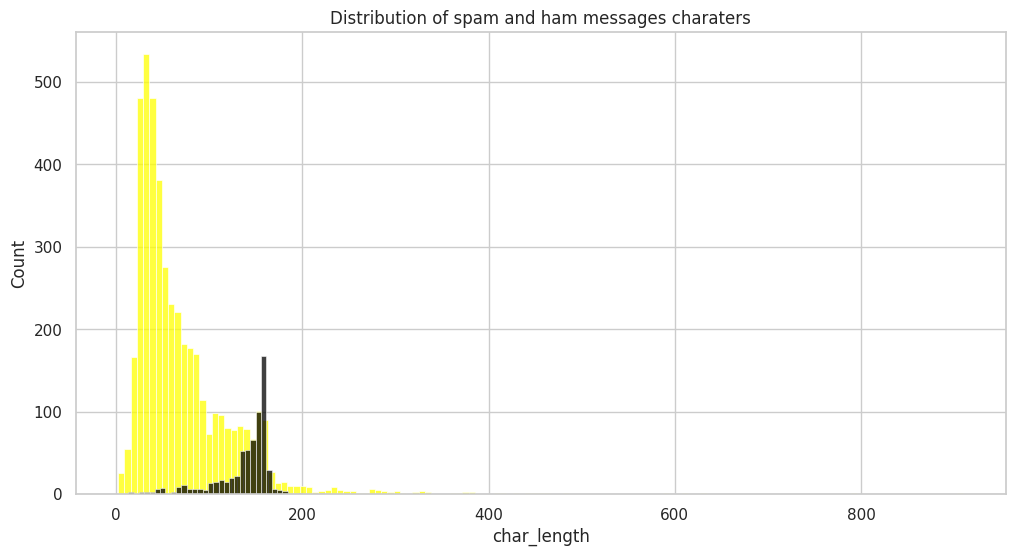

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(ds[ds['label_encoded']==0]['char_length'],color='yellow')
sns.histplot(ds[ds['label_encoded']==1]['char_length'],color='black')
plt.title('Distribution of spam and ham messages charaters')

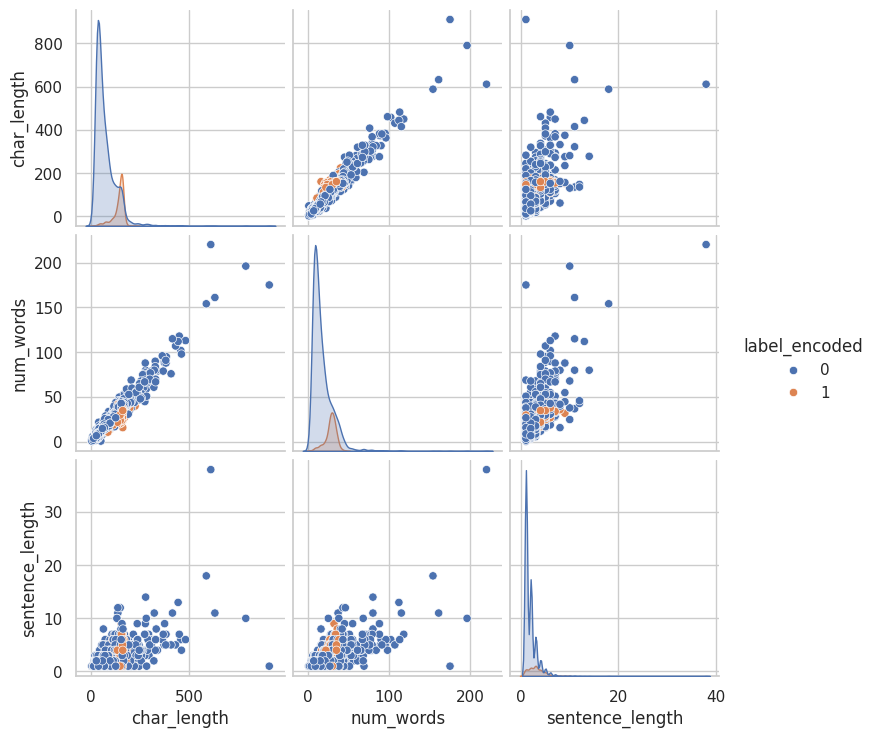

In [33]:
sns.pairplot(ds,hue='label_encoded')
plt.show()

<Axes: >

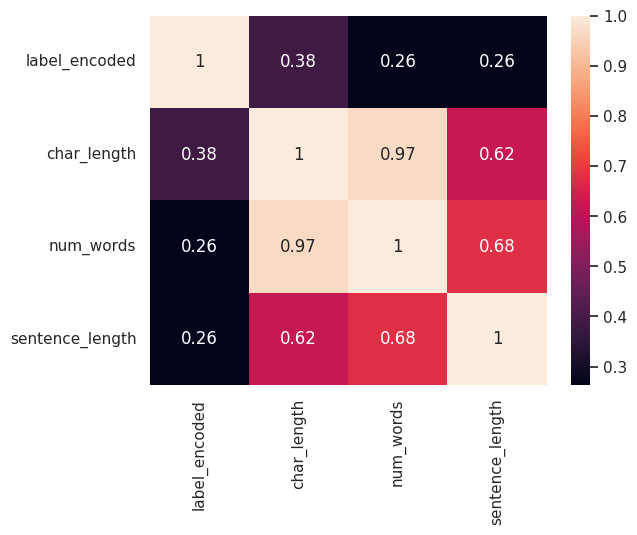

In [34]:
#using heatmap for further understanding
sns.heatmap(ds[['label_encoded','char_length', 'num_words','sentence_length']].corr(),annot=True)

DESCRIPTION: The correlation analysis reveals a positive correlation coefficient of 0.38 between the number of characters in a message and the likelihood of it being classified as spam. This suggests that as the message length increases, there is a tendency for it to be categorized as spam. This correlation may be attributed to specific characteristics or patterns associated with longer messages in the context of spam classification. DECISION - The decision to incorporate the "num_characters" column in model creation is based on its correlation coefficient of 0.38 with the target variable. This coefficient indicates a relatively stronger association compared to "num_words" and "num_sentences," emphasizing the significance of message length in predicting spam classification.

In [35]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [36]:
# Text Vectorization
x = np.array(ds['message'])
y = np.array(ds['label_encoded'])
cv = CountVectorizer()
x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [37]:
#we use Precision help to make sure that SMS classifier is accurate in catching spam while avoiding mistakes that could upset users or miss to meet goals.

In [38]:
# Model Training
clf = GaussianNB()
if not isinstance(x_train, np.ndarray):
    x_train = x_train.toarray()

clf.fit(x_train, y_train)

GaussianNB()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [39]:
# Model Evaluation
x_test_dense = x_test.toarray()
accuracy = clf.score(x_test_dense, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.90715667311412


In [40]:
# Model Training with Multinomial Naive Bayes
clf = MultinomialNB()
if not isinstance(x_train, np.ndarray):
    x_train = x_train.toarray()

clf.fit(x_train, y_train)

MultinomialNB()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [41]:
# Model Evaluation
x_test_dense = x_test.toarray()
accuracy = clf.score(x_test_dense, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9729206963249516


In [42]:
# Prediction
sample = input("Enter a message: ")
data = cv.transform([sample]).toarray()
prediction = clf.predict(data)
print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}")

Enter a message: Free entry in 2 a wkly comp to win FA Cup final
Prediction: Spam


In [43]:
# Prediction2
sample = input("Enter a message: ")
data = cv.transform([sample]).toarray()
prediction = clf.predict(data)
print(f"Prediction: {'Spam' if prediction == 1 else 'Ham'}")

Enter a message: Nah I don't think he goes to india, he lives aroundd...
Prediction: Ham
